# Проект по SQL: Сервис для чтения книг

<b>Цель исследования:</b> Проанализировать базу данных. В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта. С помощью SQL-запросов решить задания.

<b>Задания:</b>

    1) Посчитайте, сколько книг вышло после 1 января 2000 года;
    2) Для каждой книги посчитайте количество обзоров и среднюю оценку;
    3) Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из
       анализа брошюры;
    4) Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;
    5) Посчитайте среднее количество обзоров от пользователей, которые поставили больше 48 оценок
 
<b>Описание данных:</b> 

Таблица <b>books</b> 

Содержит данные о книгах:

    book_id — идентификатор книги;
    author_id — идентификатор автора;
    title — название книги;
    num_pages — количество страниц;
    publication_date — дата публикации книги;
    publisher_id — идентификатор издателя.

Таблица <b>authors</b>

Содержит данные об авторах:

    author_id — идентификатор автора;
    author — имя автора.

Таблица <b>publishers</b>

Содержит данные об издательствах:

    publisher_id — идентификатор издательства;
    publisher — название издательства;

Таблица <b>ratings</b>

Содержит данные о пользовательских оценках книг:

    rating_id — идентификатор оценки;
    book_id — идентификатор книги;
    username — имя пользователя, оставившего оценку;
    rating — оценка книги.

Таблица <b>reviews</b>

Содержит данные о пользовательских обзорах на книги:

    review_id — идентификатор обзора;
    book_id — идентификатор книги;
    username — имя пользователя, написавшего обзор;
    text — текст обзора.
    
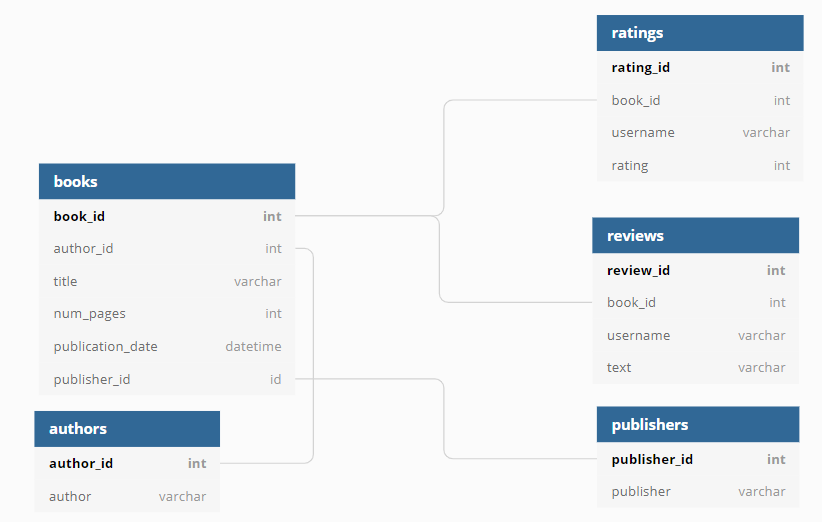

## Обзор данных

In [1]:
# импортируем библиотеки
import pandas as pd
import sqlalchemy as sa

In [2]:
# устанавливаем параметры
db_config = {
    'user': 'praktikum_student', # имя пользователя
    'pwd': 'Sdf4$2;d-d30pp', # пароль
    'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
    'port': 6432, # порт подключения
    'db': 'data-analyst-final-project-db' # название базы данных
}

connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)
# сохраняем коннектор
engine = sa.create_engine(connection_string, connect_args={'sslmode':'require'})
# чтобы выполнить SQL-запрос, пишем функцию с использованием Pandas
def get_sql_data(query:str, engine:sa.engine.base.Engine=engine) -> pd.DataFrame:
    with engine.connect() as con:
        return pd.read_sql(sql=sa.text(query), con = con)
# формируем запрос и выводим данные
query = '''SELECT * FROM books LIMIT 5'''
get_sql_data(query)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [3]:
tables = ['books', 'authors', 'publishers', 'ratings', 'reviews']
for table_name in tables:
    query = f"SELECT * FROM {table_name} LIMIT 5"
    display(get_sql_data(query))

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


In [4]:
data = get_sql_data(query)

# Проверяем пропуски
missing_data = data.isna().sum()
print("Пропуски в данных:\n", missing_data)

# Проверяем дубликаты
duplicates = data.duplicated().sum()
print("Количество дубликатов:", duplicates)

Пропуски в данных:
 review_id    0
book_id      0
username     0
text         0
dtype: int64
Количество дубликатов: 0


<b>Вывод по разделу:</b> Загрузили и рассмотрели данные. Дубликатов и пропусков в данных нет

## Задания

### Посчитайте, сколько книг вышло после 1 января 2000 года;

In [5]:
query = f"SELECT COUNT(book_id) FROM books WHERE publication_date > '2000-01-01';"
get_sql_data(query)

,count
0,819


Как видим, после 1 января 2000 ода вышло 819 книг, что составляет более 80% от общего числа

### Для каждой книги посчитайте количество обзоров и среднюю оценку

In [7]:
query = ''' SELECT b.book_id AS id,
                   b.title AS title,
                   COUNT(DISTINCT rv.review_id) AS reviews_count,
                   AVG(r.rating) AS avg_rating
            FROM books b
            LEFT JOIN reviews rv ON rv.book_id = b.book_id
            LEFT JOIN ratings r ON r.book_id = b.book_id
            GROUP BY b.book_id, b.title
            ORDER BY reviews_count DESC
            LIMIT 10;'''
get_sql_data(query)

,id,title,reviews_count,avg_rating
0,948,Twilight (Twilight #1),7,3.662500
1,696,The Da Vinci Code (Robert Langdon #2),6,3.830508
2,207,Eat Pray Love,6,3.395833
3,627,The Alchemist,6,3.789474
4,673,The Catcher in the Rye,6,3.825581
5,695,The Curious Incident of the Dog in the Night-Time,6,4.081081
6,302,Harry Potter and the Prisoner of Azkaban (Harr...,6,4.414634
7,299,Harry Potter and the Chamber of Secrets (Harry...,6,4.287500
8,497,Outlander (Outlander #1),6,4.125000
9,656,The Book Thief,6,4.264151


Посчитали количество обзоров и среднюю оценку для каждой книги. Лидером по числу обзоров оказалсь книга <b>Twilight (Twilight #1) с 7 обзорами</b>

### Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;

In [81]:
query = f'''WITH publish as (SELECT b.book_id, p.publisher
                                FROM books b
                                LEFT JOIN publishers p ON b.publisher_id = p.publisher_id
                                WHERE num_pages > 50)
             SELECT publisher,
                    count(book_id) AS amount_books    
             FROM publish
             GROUP BY publisher
             ORDER BY count(book_id) DESC
             LIMIT 10;'''
get_sql_data(query)

,publisher,amount_books
0,Penguin Books,42
1,Vintage,31
2,Grand Central Publishing,25
3,Penguin Classics,24
4,Ballantine Books,19
5,Bantam,19
6,Berkley,17
7,St. Martin's Press,14
8,Berkley Books,14
9,William Morrow Paperbacks,13


Издательство, которое выпустило наибольшее число книг толще 50 страниц - <b>Penguin Books с 42 выпущенными книгами</b>

### Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками

In [82]:
query = f''' WITH author AS (SELECT a.author,
                                    AVG(r.rating) AS avg_rating
                             FROM authors a
                             INNER JOIN books b ON a.author_id = b.author_id
                             INNER JOIN ratings r ON b.book_id = r.book_id
                             GROUP BY b.book_id, a.author_id
                             HAVING COUNT(r.rating_id) >=50)
             SELECT author,
                    ROUND(AVG(avg_rating), 2)
             FROM author
             GROUP BY author
             ORDER BY AVG(avg_rating) DESC
             LIMIT 10;'''
get_sql_data(query)

,author,round
0,J.K. Rowling/Mary GrandPré,4.28
1,Markus Zusak/Cao Xuân Việt Khương,4.26
2,J.R.R. Tolkien,4.26
3,Louisa May Alcott,4.19
4,Rick Riordan,4.08
5,William Golding,3.90
6,J.D. Salinger,3.83
7,Paulo Coelho/Alan R. Clarke/Özdemir İnce,3.79
8,William Shakespeare/Paul Werstine/Barbara A. M...,3.79
9,Dan Brown,3.75


Автором с самой высокой средней оценкой книг является <b>J.K. Rowling/Mary GrandPré</b> с средней <b>оценкой 4.28</b>

### Посчитайте среднее количество обзоров от пользователей, которые поставили больше 48 оценок

In [83]:
query = '''
WITH t as
    (SELECT username,
            COUNT(review_id) as review_count
     FROM reviews
     WHERE username in (SELECT username
                         FROM ratings
                         GROUP BY username
                         HAVING COUNT(rating) > 48)
    GROUP BY username)
    
SELECT AVG(review_count)
FROM t
       
'''
get_sql_data(query)

,avg
0,24.0


Среднее количество обзоров от пользователей, которые поставили больше 48 оценок <b>равно 24</b>

## Общий вывод

- После 1 января 2000 ода вышло 819 книг, что составляет более 80% от общего числа
- Лидером по числу обзоров оказалсь книга Twilight (Twilight #1) с 7 обзорами со средним рейтингом 3.66
- Издательство, которое выпустило наибольшее число книг толще 50 страниц - Penguin Books с 42 выпущенными книгами
- Автором с самой высокой средней оценкой книг является J.K. Rowling/Mary GrandPré с средней оценкой 4.28
- Среднее количество обзоров от пользователей, которые поставили больше 48 оценок равно 24